In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [ ]:
!pip install dataprep
from dataprep.eda import plot, plot_correlation, create_report, plot_missing

# Reading Data set:

In [ ]:
data = pd.read_excel('/content/Dummy dataset.xlsx')
data.head()

,Total O/S,TENOR_@Booking,Loan Term,BOOKING_DATE,MATURITY_DATE,DPD,DOB,AGE,AGE at Maturity,GENDER,Customer Segment
0,178630.00,120,10 Years,2019-07-31,2029-04-03,0,1983-06-23,38.469863,1948-04-04,MALE,Salaried
1,376444.57,120,10 Years,2019-03-04,2028-07-03,0,1963-09-30,58.212329,1967-12-27,MALE,Salaried
2,253984.28,84,7 Years,2019-05-05,2025-07-03,0,1965-02-24,56.806849,1963-08-01,MALE,Salaried
3,779620.11,108,9 Years,2021-04-26,2030-04-25,5,1983-12-01,38.028767,1946-10-26,MALE,Self Employed & Professional
4,103377.43,60,5 Years,2021-04-27,2026-04-25,0,1981-08-08,40.343836,1945-02-17,MALE,Salaried


In [ ]:
data2 = pd.read_csv('/content/Dummy dataset.csv')
data2.head()

,Total O/S,TENOR_@Booking,Loan Term,BOOKING_DATE,MATURITY_DATE,DPD,DOB,AGE,AGE at Maturity,GENDER,Customer Segment
0,"178,630",120,10 Years,7/31/2019,4/3/2029,0,6/23/1983,38.5,48.04,MALE,Salaried
1,"376,445",120,10 Years,3/4/2019,7/3/2028,0,9/30/1963,58.2,67.12,MALE,Salaried
2,"253,984",84,7 Years,5/5/2019,7/3/2025,0,2/24/1965,56.8,63.08,MALE,Salaried
3,"779,620",108,9 Years,4/26/2021,4/25/2030,5,12/1/1983,38.0,46.10,MALE,Self Employed & Professional
4,"103,377",60,5 Years,4/27/2021,4/25/2026,0,8/8/1981,40.3,45.02,MALE,Salaried


In [ ]:
# replace column with another column CSV and XlSX

data['AGE at Maturity'] = data2['AGE at Maturity']
data.head()

,Total O/S,TENOR_@Booking,Loan Term,BOOKING_DATE,MATURITY_DATE,DPD,DOB,AGE,AGE at Maturity,GENDER,Customer Segment
0,178630.00,120,10 Years,2019-07-31,2029-04-03,0,1983-06-23,38.469863,48.04,MALE,Salaried
1,376444.57,120,10 Years,2019-03-04,2028-07-03,0,1963-09-30,58.212329,67.12,MALE,Salaried
2,253984.28,84,7 Years,2019-05-05,2025-07-03,0,1965-02-24,56.806849,63.08,MALE,Salaried
3,779620.11,108,9 Years,2021-04-26,2030-04-25,5,1983-12-01,38.028767,46.10,MALE,Self Employed & Professional
4,103377.43,60,5 Years,2021-04-27,2026-04-25,0,1981-08-08,40.343836,45.02,MALE,Salaried


In [ ]:
# Change column names to be more readable 
data = data.rename(columns = {'Total O/S':'Total loan amount', 
                                         'TENOR_@Booking':'Loan Duration in months',
                              'DOB':'Date of Birth of the client',
                              ' DPD':'Days past dues'})

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38685 entries, 0 to 38684
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Total loan amount            38685 non-null  float64       
 1   Loan Duration in months      38685 non-null  int64         
 2   Loan Term                    38685 non-null  object        
 3   BOOKING_DATE                 38685 non-null  datetime64[ns]
 4   MATURITY_DATE                38685 non-null  datetime64[ns]
 5   Days past dues               38685 non-null  int64         
 6   Date of Birth of the client  38601 non-null  datetime64[ns]
 7   AGE                          38601 non-null  float64       
 8   AGE at Maturity              38601 non-null  object        
 9   GENDER                       38677 non-null  object        
 10  Customer Segment             38666 non-null  object        
dtypes: datetime64[ns](3), float64(2), int64(2

In [ ]:
missing = data.isnull().sum()
print(missing)

Total loan amount               0
Loan Duration in months         0
Loan Term                       0
BOOKING_DATE                    0
MATURITY_DATE                   0
Days past dues                  0
Date of Birth of the client    84
AGE                            84
AGE at Maturity                84
GENDER                          8
Customer Segment               19
dtype: int64


Date of Birth of the client    0.057534
AGE                            0.057534
AGE at Maturity                0.057534
GENDER                         0.005479
Customer Segment               0.013014
dtype: float64

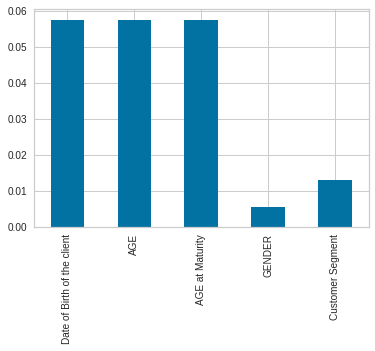

In [ ]:
# Visualizing Missing values in each columns 

missing = missing[missing > 0]/1460 # masking (filtering)
missing.plot.bar()
missing

In [ ]:
# Drop Null values 
data = data.dropna()

In [ ]:
print(data.duplicated().sum())
data.drop_duplicates(inplace=True)
print(data.duplicated().sum())

798
0


In [ ]:
# drop rows with negative value for Age 
data = data[data.AGE > 0]
data = data[data['Total loan amount'] < 2.0e+07]


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Total loan amount,37722.0,179399.540274,364755.738613,0.050000,35850.862500,90604.585000,184886.000000,1.307853e+07
Loan Duration in months,37722.0,86.734373,27.606884,12.000000,60.000000,84.000000,108.000000,1.200000e+02
Days past dues,37722.0,14.055326,64.387241,0.000000,0.000000,0.000000,0.000000,2.470000e+03
AGE,37722.0,44.178489,9.517474,1.376712,36.941096,43.346575,50.782192,8.634110e+01


In [ ]:
# Cleaning Data Set 

data['Loan Term'] = data['Loan Term'].map(lambda x: x.rstrip('Years'))
data['Loan Term'] = data['Loan Term'].map(lambda x: x.lstrip('More than'))

# Convert to umeric values 
data["Loan Term"] = pd.to_numeric(data["Loan Term"])
data["AGE at Maturity"] = pd.to_numeric(data["AGE at Maturity"])



In [ ]:
data['GENDER'].value_counts()

MALE      31667
FEMALE     6047
Male          7
Female        1
Name: GENDER, dtype: int64

In [ ]:
data["GENDER"].replace( {'Female' : 'FEMALE', 'Male': 'MALE'},inplace=True)

In [ ]:
data['GENDER'].value_counts()

MALE      31674
FEMALE     6048
Name: GENDER, dtype: int64

In [ ]:
data.head()

,Total loan amount,Loan Duration in months,Loan Term,BOOKING_DATE,MATURITY_DATE,Days past dues,Date of Birth of the client,AGE,AGE at Maturity,GENDER,Customer Segment
0,178630.00,120,10,2019-07-31,2029-04-03,0,1983-06-23,38.469863,48.04,MALE,Salaried
1,376444.57,120,10,2019-03-04,2028-07-03,0,1963-09-30,58.212329,67.12,MALE,Salaried
2,253984.28,84,7,2019-05-05,2025-07-03,0,1965-02-24,56.806849,63.08,MALE,Salaried
3,779620.11,108,9,2021-04-26,2030-04-25,5,1983-12-01,38.028767,46.10,MALE,Self Employed & Professional
4,103377.43,60,5,2021-04-27,2026-04-25,0,1981-08-08,40.343836,45.02,MALE,Salaried


In [ ]:
missing = data.isnull().sum()
print(missing)

Total loan amount              0
Loan Duration in months        0
Loan Term                      0
BOOKING_DATE                   0
MATURITY_DATE                  0
Days past dues                 0
Date of Birth of the client    0
AGE                            0
AGE at Maturity                0
GENDER                         0
Customer Segment               0
dtype: int64


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37722 entries, 0 to 38684
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Total loan amount            37722 non-null  float64       
 1   Loan Duration in months      37722 non-null  int64         
 2   Loan Term                    37722 non-null  int64         
 3   BOOKING_DATE                 37722 non-null  datetime64[ns]
 4   MATURITY_DATE                37722 non-null  datetime64[ns]
 5   Days past dues               37722 non-null  int64         
 6   Date of Birth of the client  37722 non-null  datetime64[ns]
 7   AGE                          37722 non-null  float64       
 8   AGE at Maturity              37722 non-null  float64       
 9   GENDER                       37722 non-null  object        
 10  Customer Segment             37722 non-null  object        
dtypes: datetime64[ns](3), float64(3), int64(3

# Visualization of Features:
Analysis Incuded: 
- Univariant 
- Bivariant 
-

In [ ]:

#data = pd.get_dummies(data, columns = ['Customer Segment'], drop_first=True)
data= pd.get_dummies(data)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37722 entries, 0 to 38684
Data columns (total 13 columns):
 #   Column                                         Non-Null Count  Dtype         
---  ------                                         --------------  -----         
 0   Total loan amount                              37722 non-null  float64       
 1   Loan Duration in months                        37722 non-null  int64         
 2   Loan Term                                      37722 non-null  int64         
 3   BOOKING_DATE                                   37722 non-null  datetime64[ns]
 4   MATURITY_DATE                                  37722 non-null  datetime64[ns]
 5   Days past dues                                 37722 non-null  int64         
 6   Date of Birth of the client                    37722 non-null  datetime64[ns]
 7   AGE                                            37722 non-null  float64       
 8   AGE at Maturity                                37722 non

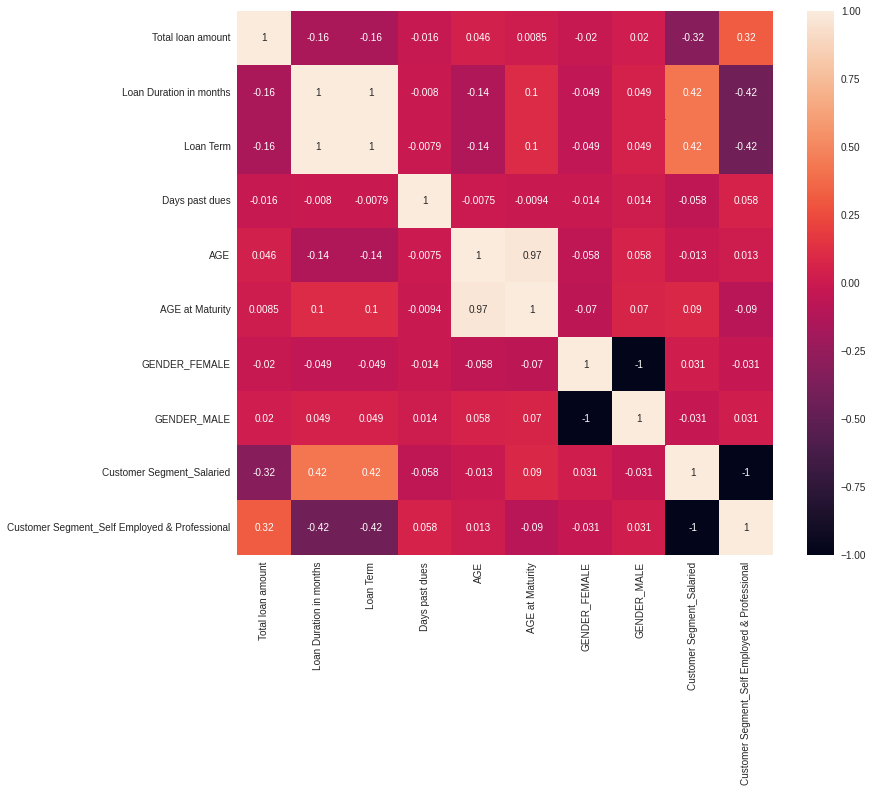

In [ ]:
fig = plt.figure(figsize=(12,10))
sns.heatmap(data.corr() , annot=True)

###Univariant

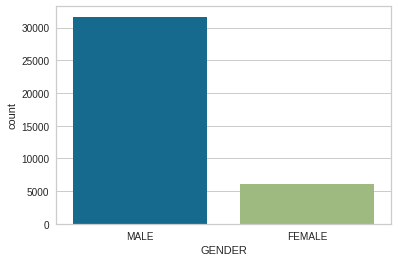

In [ ]:
# Gender 
sns.countplot(x ='GENDER', data = data)

Males are more frequently applying for loans

In [ ]:
#sns.countplot(x ='AGE', data = data)

In [ ]:
plot(data['AGE'])

The middle ages from 20 to 60 are the most people who take loans and that is 

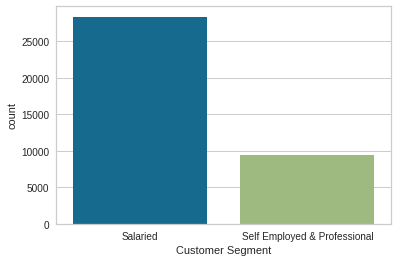

In [ ]:
sns.countplot(x ='Customer Segment', data = data)

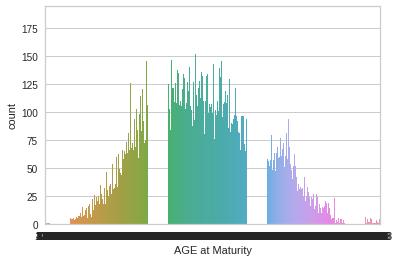

In [ ]:
sns.countplot(x ='AGE at Maturity', data = data)


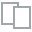
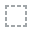
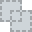
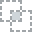
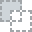
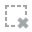
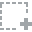
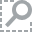
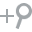
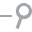
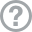
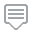
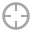
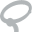
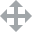
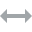
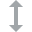
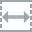
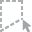
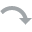
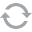
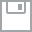
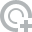
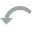
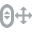
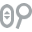
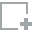
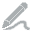
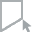
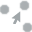
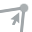
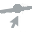

In [ ]:
plot(data['AGE at Maturity'])

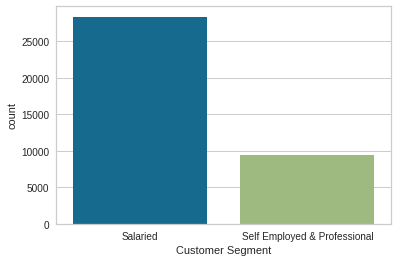

In [ ]:
sns.countplot(x='Customer Segment',data=data)

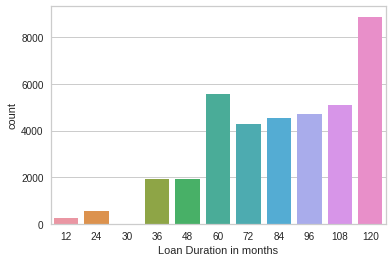

In [ ]:
sns.countplot(x='Loan Duration in months',data=data)

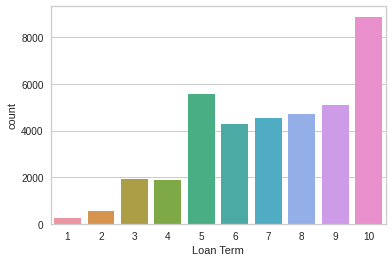

In [ ]:
sns.countplot(x='Loan Term',data=data)

###Bivariant 

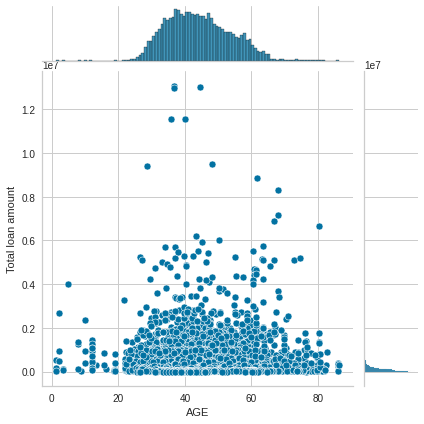

In [ ]:
sns.jointplot( x='AGE', y='Total loan amount',data=data )

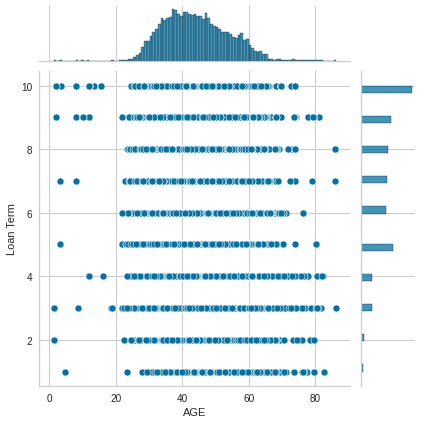

In [ ]:
sns.jointplot( x='AGE', y='Loan Term',data=data )

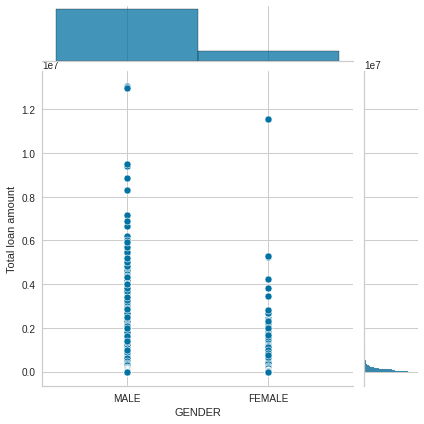

In [ ]:
sns.jointplot(x = 'GENDER', y = 'Total loan amount', data = data)

In [ ]:
#plt.figure(figsize = (10,5))
#sns.countplot(x = 'GENDER', hue = 'Total loan amount', data = data, palette = 'Set2')
#plt.show()

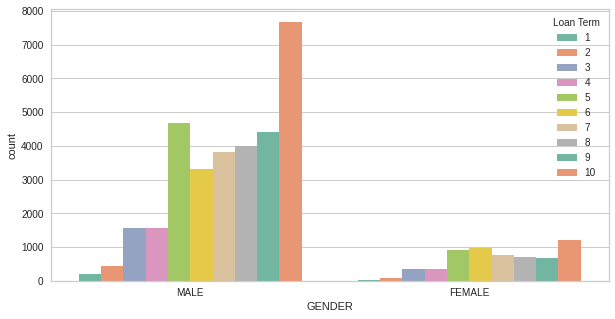

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'GENDER', hue = 'Loan Term', data = data, palette = 'Set2')
plt.show()

In [ ]:
#plt.figure(figsize = (10,5))
#sns.countplot(x = 'Customer Segment', hue = 'Total loan amount', data = data, palette = 'Set2')
#plt.show()

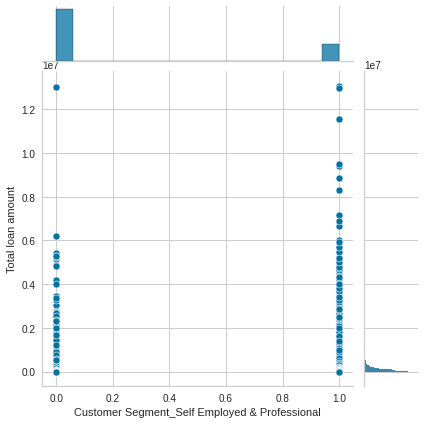

In [ ]:
sns.jointplot(x = 'Customer Segment_Self Employed & Professional', y = 'Total loan amount', data = data)

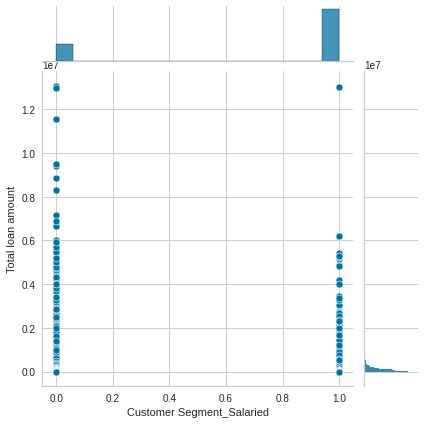

In [ ]:
sns.jointplot(x = 'Customer Segment_Salaried', y = 'Total loan amount', data = data)

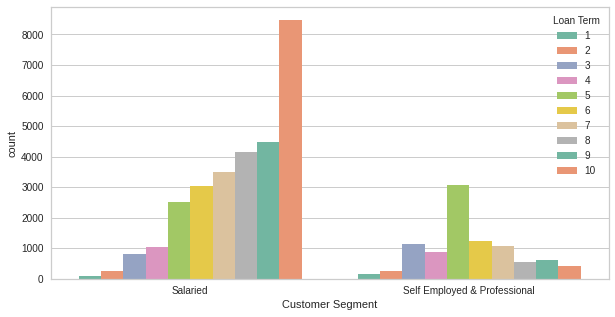

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'Customer Segment', hue = 'Loan Term', data = data, palette = 'Set2')
plt.show()

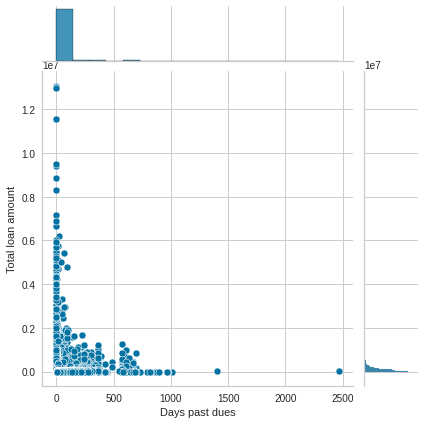

In [ ]:
sns.jointplot( x='Days past dues', y='Total loan amount',data=data )

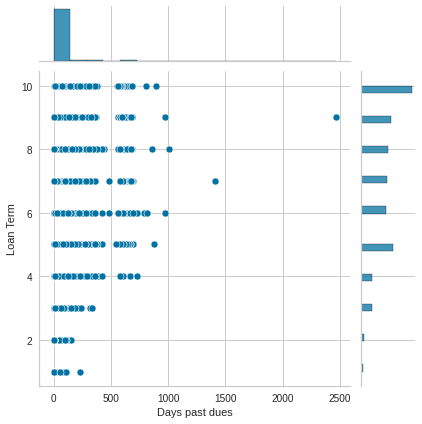

In [ ]:
sns.jointplot( x='Days past dues', y='Loan Term',data=data )

# Encodig:

In [ ]:
## Encoding
#gender_encoder = LabelEncoder()
#data['GENDER'] = gender_encoder.fit_transform(data['GENDER'])


In [ ]:
#data['Customer Segment'].value_counts()

Salaried                        28355
Self Employed & Professional     9367
Name: Customer Segment, dtype: int64

In [ ]:
# Label encoding for customer segment
#customer_encoder = LabelEncoder()
#data['Customer Segment'] = customer_encoder.fit_transform(data['Customer Segment'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37722 entries, 0 to 38684
Data columns (total 13 columns):
 #   Column                                         Non-Null Count  Dtype         
---  ------                                         --------------  -----         
 0   Total loan amount                              37722 non-null  float64       
 1   Loan Duration in months                        37722 non-null  int64         
 2   Loan Term                                      37722 non-null  int64         
 3   BOOKING_DATE                                   37722 non-null  datetime64[ns]
 4   MATURITY_DATE                                  37722 non-null  datetime64[ns]
 5   Days past dues                                 37722 non-null  int64         
 6   Date of Birth of the client                    37722 non-null  datetime64[ns]
 7   AGE                                            37722 non-null  float64       
 8   AGE at Maturity                                37722 non

Comment: All qualitative data has been either encoded or converted to numeric values so that we can use use them for Clustering *analysis*.

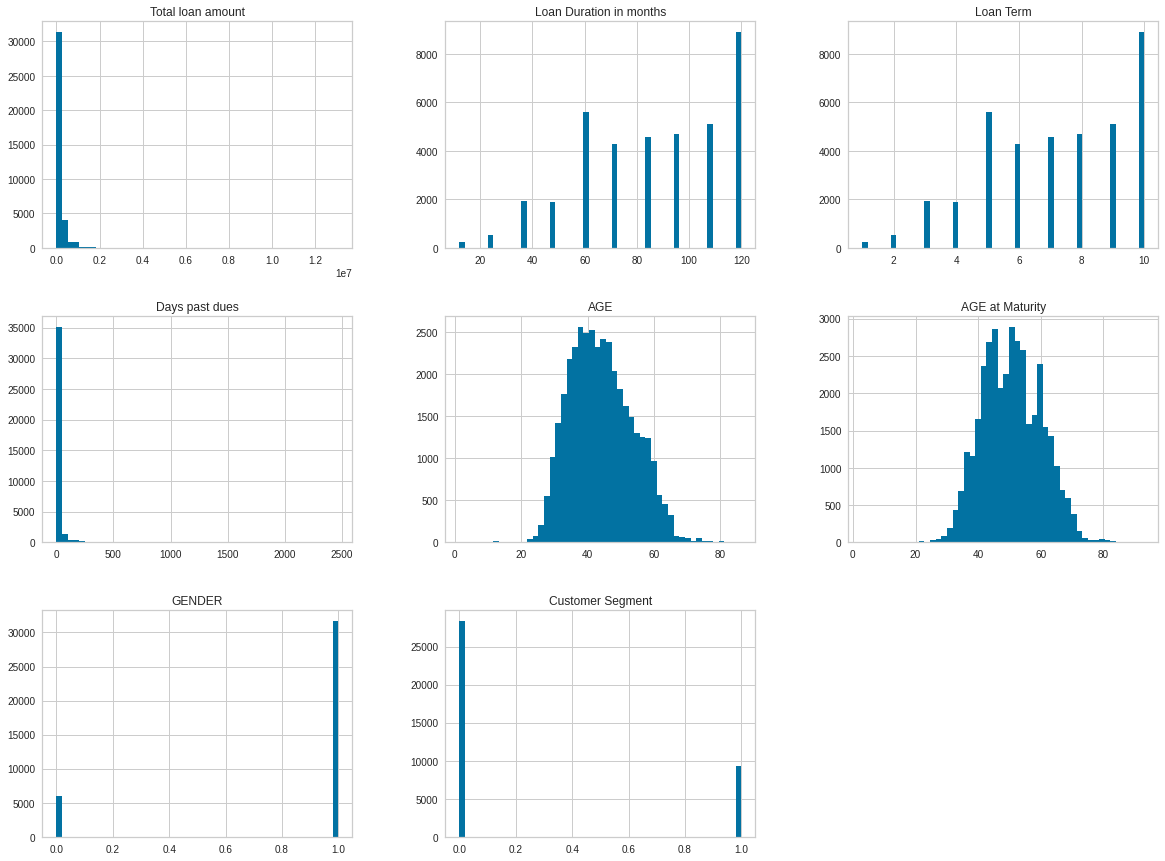

In [ ]:
data.hist(bins=50, figsize=(20,15))
plt.show()


The same range of ages that uses loans as above, but here shows that the highest duration that most of the users apply for is 120 months

Males have a higher propapility to take loan than the females

Defining Biplot function that would be used later in visualizing the clusters.

In [ ]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    sns.scatterplot(x = xs * scalex, y = ys * scaley , hue = kmeans.labels_, palette = "tab10")
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'k', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

# Method 1: PCA then clustering
We will first apply PCA to obtain the two most Important features, then use them to cluster the data. We will use the Elbow Method to decide on the number of clusters that we should use, we will be using all features except for dates since the information included in those features is already represented by other features.

In [ ]:
col1 = ['Total loan amount','Loan Term','Days past dues',
'AGE','AGE at Maturity','Customer Segment_Salaried','Customer Segment_Self Employed & Professional']
data_modified1 = data[col1]

In [ ]:
# Scaling The data 
scaler = StandardScaler()
scaler.fit(data_modified1)
train1 = scaler.transform(data_modified1)

In [ ]:
# Transform the data
pca = PCA(2)
pca_train1 = pca.fit_transform(train1)
print(pca_train1.shape)
print(np.sum(pca.explained_variance_ratio_) ) #----->

(37722, 2)
0.6324209222153296


We will use the k-means method for clustering, but first need to choose the number of clusters K using Elbow method. 

Elbow Method:



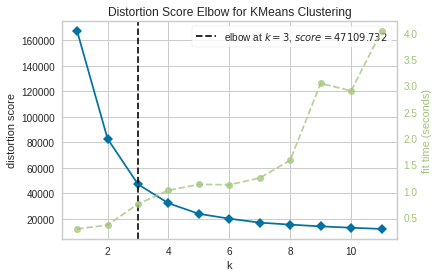

In [ ]:
# Elbow Method ----> Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(pca_train1)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [ ]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(pca_train1)
kmeans.predict(pca_train1)

kmeans.cluster_centers_

array([[-0.90778139,  1.23914619],
       [ 2.60782525,  0.07749833],
       [-0.80300617, -1.03069104]])

Visualization:
Plotting the clusters with their Centroids.

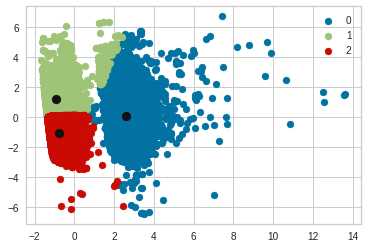

In [ ]:
# Getting the Centroids
label = kmeans.fit_predict(pca_train1)
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)

# Plotting the results:
for i in u_labels:
    plt.scatter(pca_train1[label == i , 0] , pca_train1[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

Using biplot to  

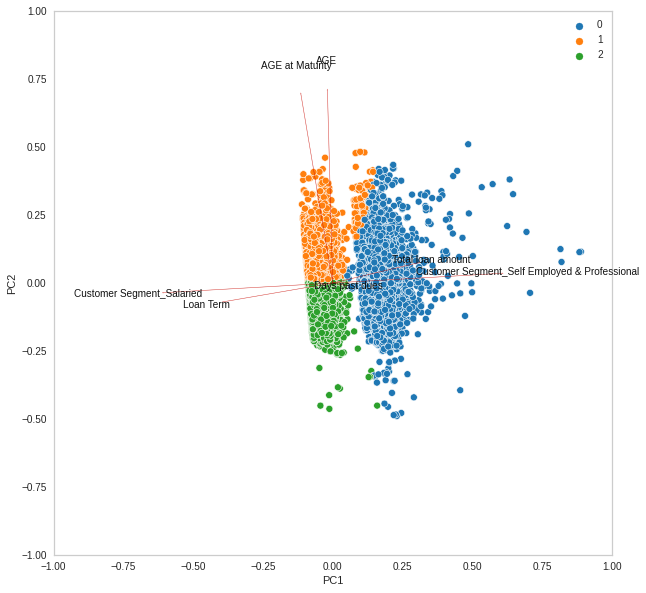

In [ ]:
plt.figure(figsize = (10,10))
myplot(pca_train1[:,0:2],np.transpose(pca.components_[0:2, :]), labels = col1)
plt.show()

Comment:

Using subset of the features:

In [ ]:
# Selecting Only 4 features to use in clustering
col2 = ['Total loan amount','Loan Duration in months','Days past dues']
data_modified2 = data[col2]


In [ ]:
# Scaling The data 
scaler = StandardScaler()
scaler.fit(data_modified2)
train2 = scaler.transform(data_modified2)

In [ ]:
pca = PCA(2)
pca_train2 = pca.fit_transform(train2)
print(pca_train2.shape)
print(np.sum(pca.explained_variance_ratio_) ) #----->

(37722, 2)
0.7193913744188278


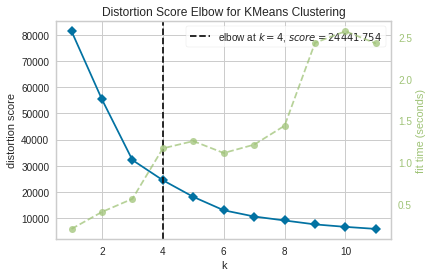

In [ ]:
# Elbow Method ----> Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(pca_train2)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [ ]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(pca_train2)
kmeans.predict(pca_train2)

kmeans.cluster_centers_

array([[ 0.87161211,  0.04047667],
       [-0.61748472, -0.16861482],
       [-0.3197797 ,  7.60388854],
       [ 6.14352526, -0.42313619]])

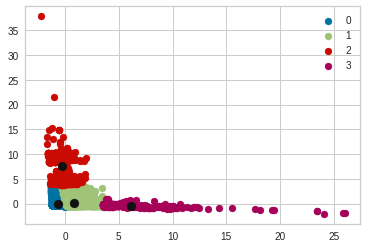

In [ ]:
# Getting the Centroids
label = kmeans.fit_predict(pca_train2)
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)

# Plotting the results:
for i in u_labels:
    plt.scatter(pca_train2[label == i , 0] , pca_train2[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

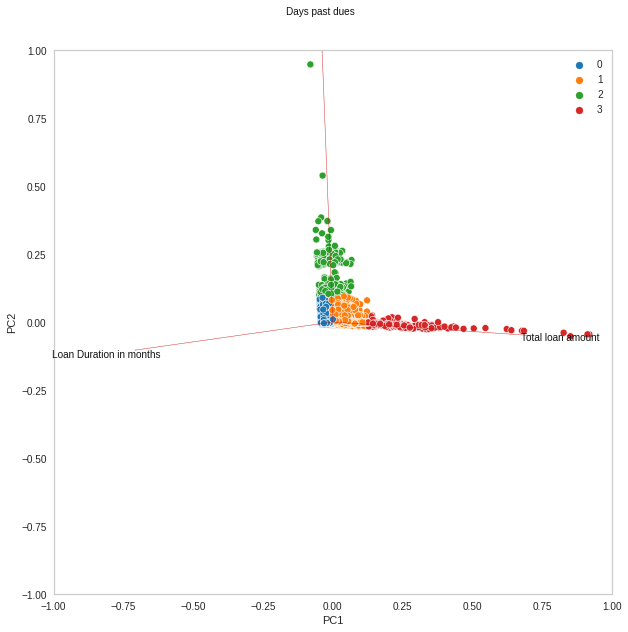

In [ ]:
plt.figure(figsize = (10,10))
myplot(pca_train2[:,0:2],np.transpose(pca.components_[0:2, :]), labels = col2)
plt.show()

Using a subset of features:

In [ ]:
col3 = ['Total loan amount','Loan Term','Days past dues',
'AGE','GENDER_MALE','GENDER_FEMALE']
data_modified3 = data[col3]

In [ ]:
# Scaling The data 
scaler = StandardScaler()
scaler.fit(data_modified3)
train3 = scaler.transform(data_modified3)

In [ ]:
pca = PCA(2)
pca_train3 = pca.fit_transform(train3)
print(pca_train3.shape)
print(np.sum(pca.explained_variance_ratio_) ) #----->

(37722, 2)
0.5405868890590834


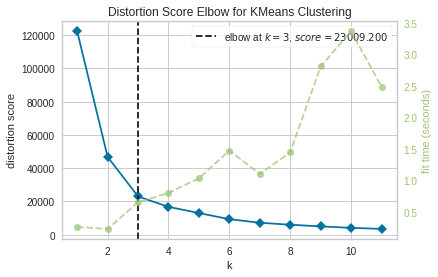

In [ ]:
# Elbow Method ----> Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(pca_train3)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [ ]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(pca_train3)
kmeans.predict(pca_train3)

kmeans.cluster_centers_

array([[-0.61567092, -0.65105365],
       [ 3.23917145,  0.01488368],
       [-0.62188008,  1.15817863]])

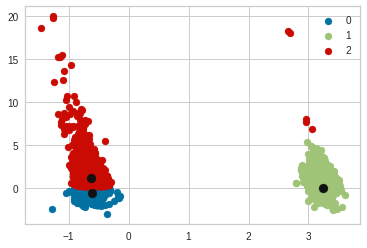

In [ ]:
# Getting the Centroids
label = kmeans.fit_predict(pca_train3)
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)

# Plotting the results:
for i in u_labels:
    plt.scatter(pca_train3[label == i , 0] , pca_train3[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

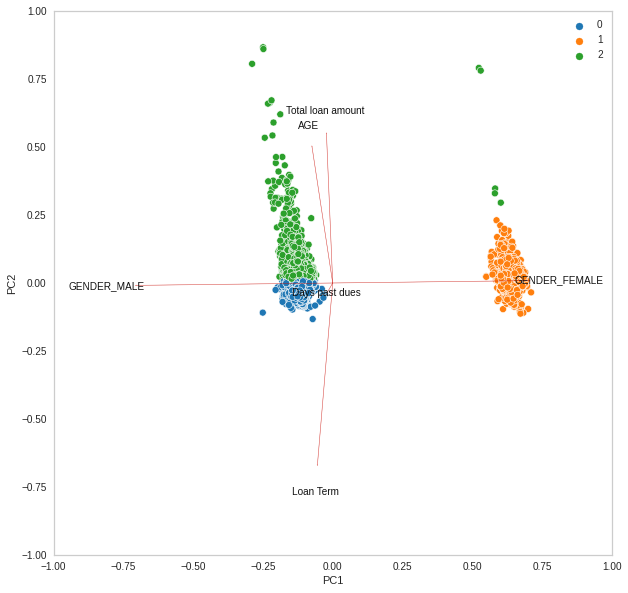

In [ ]:
plt.figure(figsize = (10,10))
myplot(pca_train3[:,0:2],np.transpose(pca.components_[0:2, :]), labels = col3)
plt.show()

# Method 2: Clustering then PCA 



In [ ]:
col = col = ['Total loan amount','Loan Term','Days past dues',
'AGE','Customer Segment_Salaried', 'Customer Segment_Self Employed & Professional']
df_train = data[col]


In [ ]:
# Scaling The data 
train = StandardScaler().fit_transform(df_train) 
train

array([[-2.10976934e-03,  1.20507365e+00, -2.18296544e-01,
        -5.99812650e-01,  5.74758542e-01, -5.74758542e-01],
       [ 5.40218071e-01,  1.20507365e+00, -2.18296544e-01,
         1.47455364e+00,  5.74758542e-01, -5.74758542e-01],
       [ 2.04481302e-01, -9.91109285e-02, -2.18296544e-01,
         1.32687811e+00,  5.74758542e-01, -5.74758542e-01],
       ...,
       [-4.91827130e-01,  7.70345454e-01, -1.25109144e-01,
        -2.92083318e-01,  5.74758542e-01, -5.74758542e-01],
       [-4.91835245e-01,  3.35617263e-01,  8.85194370e+00,
        -7.61017913e-01,  5.74758542e-01, -5.74758542e-01],
       [-4.91839221e-01,  7.70345454e-01,  1.89395118e+00,
        -5.56056936e-01,  5.74758542e-01, -5.74758542e-01]])

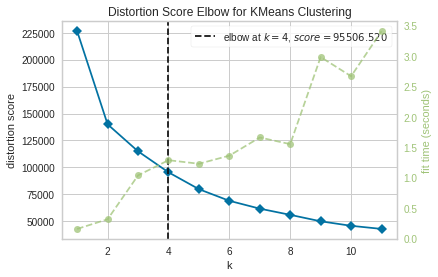

In [ ]:
# Elbow Method -----> Instantiate the clustering model and visualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(train)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

Comment:

In [ ]:
kmeans = KMeans(5)
kmeans.fit(train)
labels = kmeans.labels_

In [ ]:
y_kmeans = kmeans.fit_predict(train)

In [ ]:
pca = PCA(n_components = 2)
pca_train = pca.fit_transform(train)

In [ ]:
pca_df = pd.DataFrame(data = pca_train, columns = ['v1', 'v2']) # msh bnsta5dmoh 

In [ ]:
data_cluster = pd.concat([ df_train , pd.DataFrame({'cluster': labels})], axis=1)
data_cluster.head()

,Total loan amount,Loan Term,Days past dues,AGE,Customer Segment_Salaried,Customer Segment_Self Employed & Professional,cluster
0,178630.00,10.0,0.0,38.469863,1.0,0.0,3.0
1,376444.57,10.0,0.0,58.212329,1.0,0.0,0.0
2,253984.28,7.0,0.0,56.806849,1.0,0.0,0.0
3,779620.11,9.0,5.0,38.028767,0.0,1.0,4.0
4,103377.43,5.0,0.0,40.343836,1.0,0.0,0.0


In [ ]:
pca_df_1 = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis=1)
pca_df_1.head()

,v1,v2,cluster
0,-1.221981,0.585605,3
1,-0.931879,-1.198465,0
2,-0.529161,-1.401086,0
3,2.282029,1.021572,4
4,-0.414575,-0.151509,0


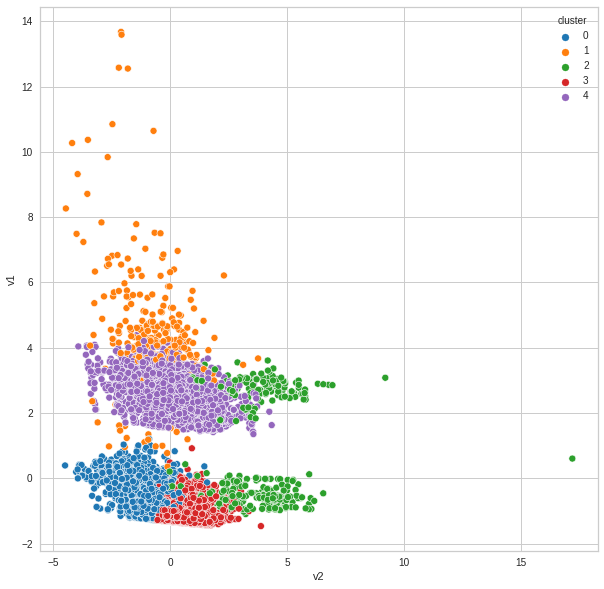

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x = "v2", y = "v1", hue = "cluster", data = pca_df_1, palette = "tab10")
plt.show()

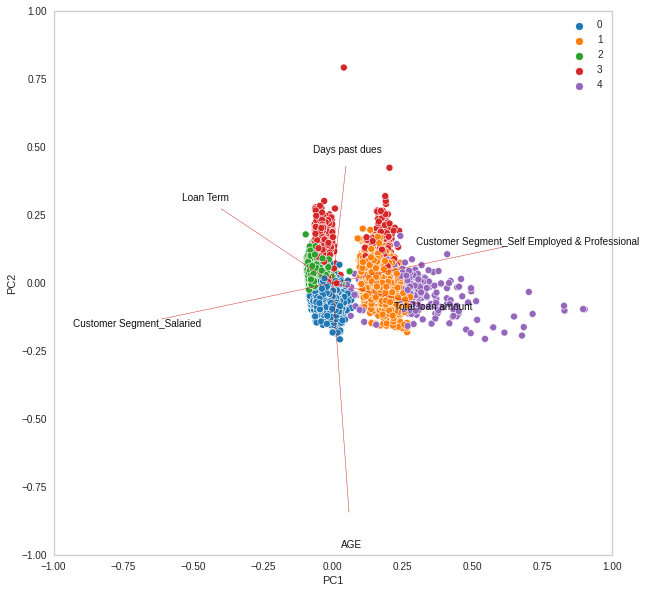

In [ ]:
#Call the function. Use only the 2 PCs.
plt.figure(figsize = (10,10))
myplot(pca_train[:,0:2],np.transpose(pca.components_[0:2, :]), labels = col)
plt.show()

Comment (Clusters):

Using () features for clustering. 

In [ ]:
col = ['Total loan amount','Loan Duration in months','Days past dues',
'AGE','GENDER_MALE','GENDER_FEMALE','Customer Segment_Salaried','Customer Segment_Self Employed & Professional']
data_modified = data[col]

In [ ]:
# Scaling The data 
train = StandardScaler().fit_transform(data_modified) 
train

array([[-2.10976934e-03,  1.20499179e+00, -2.18296544e-01, ...,
        -4.36972831e-01,  5.74758542e-01, -5.74758542e-01],
       [ 5.40218071e-01,  1.20499179e+00, -2.18296544e-01, ...,
        -4.36972831e-01,  5.74758542e-01, -5.74758542e-01],
       [ 2.04481302e-01, -9.90480769e-02, -2.18296544e-01, ...,
        -4.36972831e-01,  5.74758542e-01, -5.74758542e-01],
       ...,
       [-4.91827130e-01,  7.70311834e-01, -1.25109144e-01, ...,
        -4.36972831e-01,  5.74758542e-01, -5.74758542e-01],
       [-4.91835245e-01,  3.35631878e-01,  8.85194370e+00, ...,
        -4.36972831e-01,  5.74758542e-01, -5.74758542e-01],
       [-4.91839221e-01,  7.70311834e-01,  1.89395118e+00, ...,
        -4.36972831e-01,  5.74758542e-01, -5.74758542e-01]])

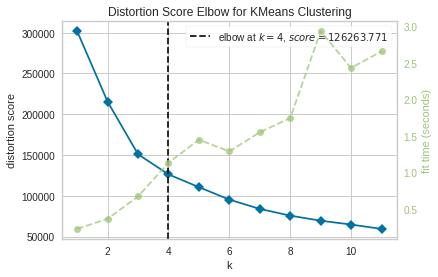

In [ ]:
# Elbow Method -----> Instantiate the clustering model and visualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(train)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [ ]:
kmeans = KMeans(3)
kmeans.fit(train)
labels = kmeans.labels_

In [ ]:
y_kmeans = kmeans.fit_predict(train)

In [ ]:
pca = PCA(n_components=2)
pca_train = pca.fit_transform(train)

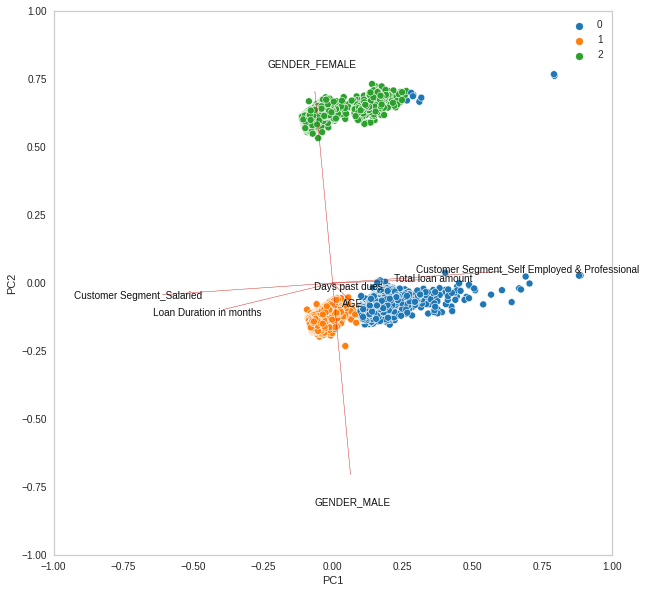

In [ ]:
#Call the function. Use only the 2 PCs.
plt.figure(figsize = (10,10))
myplot(pca_train[:,0:2],np.transpose(pca.components_[0:2, :]), labels = col)
plt.show()

In [ ]:
pca_df = pd.DataFrame(data = pca_train, columns=['v1', 'v2'])

In [ ]:
pca_df_1 = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis=1)
pca_df_1.head()

,v1,v2,cluster
0,-1.160484,-0.736455,0
1,-0.861512,-0.866151,0
2,-0.467026,-0.733818,0
3,2.332999,-0.474316,1
4,-0.364961,-0.540809,0


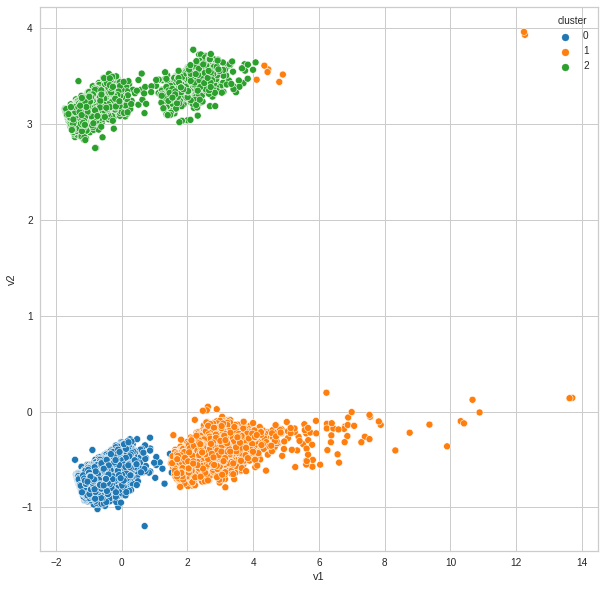

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x = "v1", y = "v2", hue = "cluster", data = pca_df_1, palette = "tab10")
plt.show()

# supervised models:


In [ ]:
features = ['Total loan amount','Loan Duration in months','Days past dues',
'AGE','GENDER_MALE','GENDER_FEMALE','Customer Segment_Salaried','Customer Segment_Self Employed & Professional']
supv_data = data[features]


In [ ]:
supv_data['Days past dues'].values[supv_data['Days past dues'].values > 0] = 1

In [ ]:
supv_data['Days past dues'].unique()

array([0, 1])

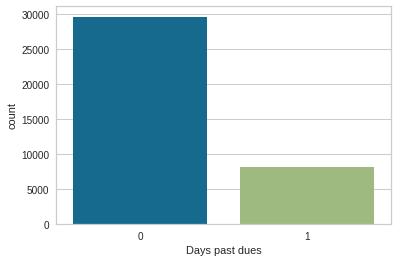

In [ ]:
supv_data['Days past dues'].value_counts()
sns.countplot(x='Days past dues', data = supv_data)

Data set is unbalanced and thus we will the SMOTEENN method to handle this issue.

In [ ]:
columns = ['Total loan amount','Loan Duration in months',
'AGE','GENDER_MALE','GENDER_FEMALE','Customer Segment_Salaried','Customer Segment_Self Employed & Professional']
X = supv_data[columns] 
y = supv_data['Days past dues']


In [ ]:

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)


In [ ]:
from imblearn.combine import SMOTEENN
sm = SMOTEENN()
x_resampled, y_resampled = sm.fit_resample(X,y)

X_train , X_test , y_train , y_test = train_test_split(x_resampled,y_resampled,test_size = 0.3 , random_state = 75)
print(X_train.shape)
print(X_test.shape)

(18179, 7)
(7792, 7)


In [ ]:
# KNN Model
clf = KNeighborsClassifier()
scores = cross_val_score(clf, X_train, y_train, cv = 5)
print('Average Score for KNN = {}'.format(np.round(scores.mean()*100,2)))

# DTrees
clf = DecisionTreeClassifier()
scores = cross_val_score(clf, X_train, y_train, cv=5)
print('Average Score for DTrees = {}'.format(np.round(scores.mean()*100,2)))

# Logistic regression 
clf = LogisticRegression()
scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5, n_jobs=-1)
print('Average Score for Logistic Regreesion = {}%'.format(np.round(scores.mean()*100,2)))

Average Score for KNN = 84.89
Average Score for DTrees = 83.71
Average Score for Logistic Regreesion = 55.7%


In [ ]:
# Random forsest
RF_min2 = RandomForestClassifier()
scores = cross_val_score(RF_min2, X_train,  y_train, cv = 5)
print('Average Score for Random forsest = {}'.format(np.round(scores.mean()*100,2)))

Average Score for Random forsest = 89.54


In [ ]:
RF_min2.fit(X_train, y_train)
ymin2RF_pred = RF_min2.predict( X_test)

print(classification_report(y_test,ymin2RF_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90      3486
           1       0.91      0.94      0.92      4306

    accuracy                           0.91      7792
   macro avg       0.91      0.91      0.91      7792
weighted avg       0.91      0.91      0.91      7792



Comment:

Bagging model 

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

clf = BaggingClassifier(base_estimator = KNeighborsClassifier() ,n_estimators = 10 , random_state = 0)

In [ ]:
clf.fit(X_train, y_train)
yrf_pred = clf.predict(X_test)
yrf_pred
print(classification_report(y_test,yrf_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86      3486
           1       0.87      0.91      0.89      4306

    accuracy                           0.88      7792
   macro avg       0.88      0.88      0.88      7792
weighted avg       0.88      0.88      0.88      7792

